In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in the Churn data set
churn = pd.read_csv("C:\\Users\\ehich\\Downloads\\churn.txt")

In [2]:
churn.shape

(3333, 21)

In [3]:
churn.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [4]:
churn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [5]:
n = 0
for value in churn['Churn?']:
    if value == 'True.':
        n += 1
print(n)


483


In [6]:
print(churn['Churn?'].unique())


['False.' 'True.']


In [7]:
z = 0
for value in churn['Churn?']:
    if value == 'False.':
        z += 1
print(n)

483


In [8]:
churn_rate = round(n/(n+z)*100, 1)
churn_rate

14.5

In [9]:
churn.info

<bound method DataFrame.info of      State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0       KS             128        415  382-4657         no        yes   
1       OH             107        415  371-7191         no        yes   
2       NJ             137        415  358-1921         no         no   
3       OH              84        408  375-9999        yes         no   
4       OK              75        415  330-6626        yes         no   
...    ...             ...        ...       ...        ...        ...   
3328    AZ             192        415  414-4276         no        yes   
3329    WV              68        415  370-3271         no         no   
3330    RI              28        510  328-8230         no         no   
3331    CT             184        510  364-6381        yes         no   
3332    TN              74        415  400-4344         no        yes   

      VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  \
0                25

In [10]:
churn['Churn?'].value_counts()

Churn?
False.    2850
True.      483
Name: count, dtype: int64

In [11]:
churn['Churn?'].value_counts(normalize = True)*100

Churn?
False.    85.508551
True.     14.491449
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Churn')

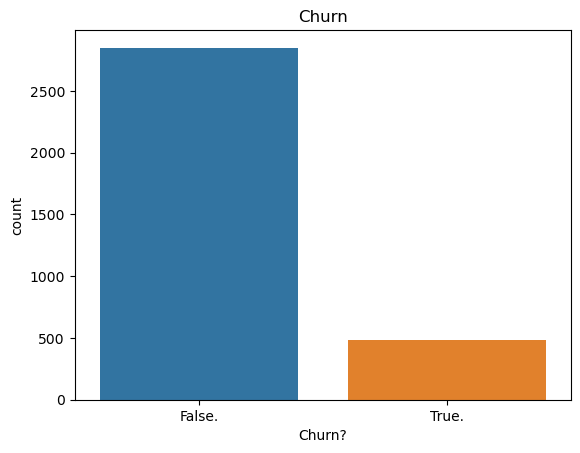

In [12]:
ax = sns.countplot(x = churn['Churn?'])
ax.set_title('Churn')

<Axes: title={'center': 'Churning Customers'}, xlabel='Churn?'>

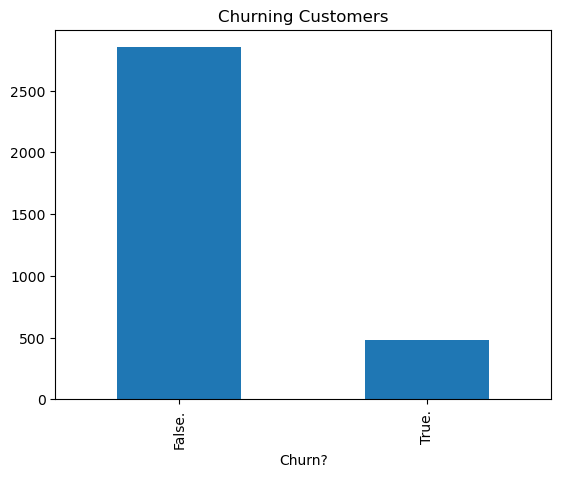

In [13]:
churn["Churn?"].value_counts().plot(kind='bar', title= "Churning Customers")


In [14]:
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Int'l Plan"],
margins=False)
churn_crosstab

Int'l Plan,no,yes
Churn?,,
False.,2664,186
True.,346,137


In [15]:
pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=True)

Int'l Plan,no,yes,All
Churn?,,,
False.,2664,186,2850
True.,346,137,483
All,3010,323,3333


<Axes: xlabel="Int'l Plan">

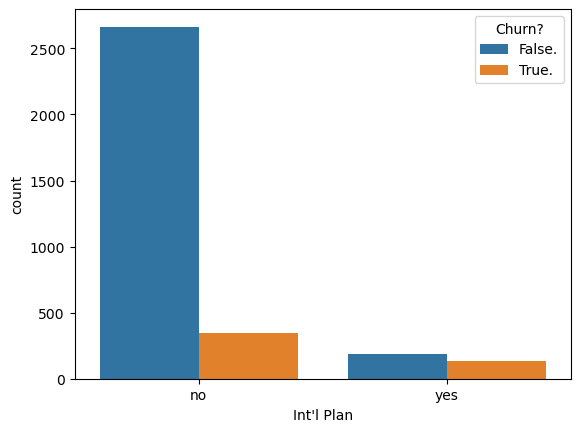

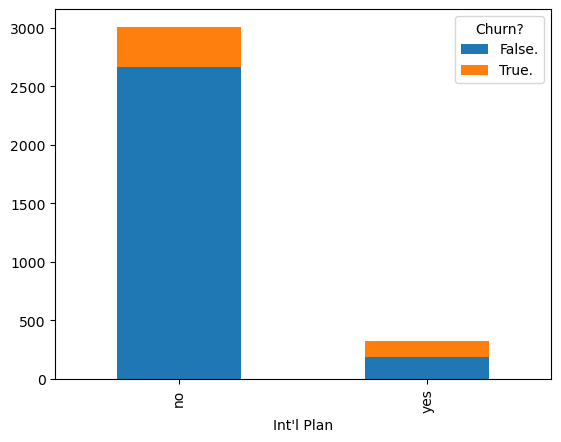

In [16]:
sns.countplot(x="Int'l Plan", hue="Churn?", data=churn)
churn_crosstab = churn_crosstab.transpose()
churn_crosstab.plot(kind = 'bar', stacked = True)

<Axes: xlabel="Int'l Plan">

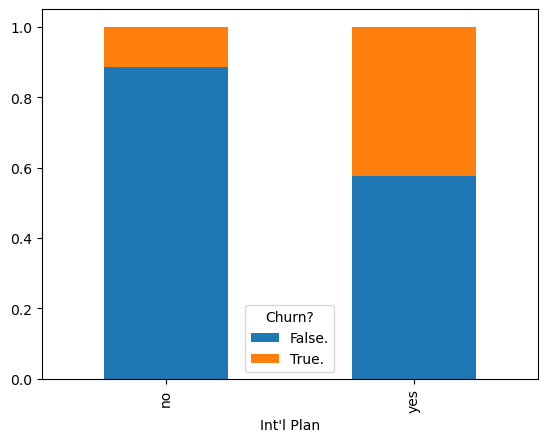

In [17]:
churn_crosstab_norm = churn_crosstab.div(churn_crosstab.sum(axis=1),
axis=0)
churn_crosstab_norm
churn_crosstab_norm.plot(kind = 'bar', stacked = True)

array([[<Axes: title={'center': 'Account Length'}>,
        <Axes: title={'center': 'Area Code'}>,
        <Axes: title={'center': 'VMail Message'}>,
        <Axes: title={'center': 'Day Mins'}>],
       [<Axes: title={'center': 'Day Calls'}>,
        <Axes: title={'center': 'Day Charge'}>,
        <Axes: title={'center': 'Eve Mins'}>,
        <Axes: title={'center': 'Eve Calls'}>],
       [<Axes: title={'center': 'Eve Charge'}>,
        <Axes: title={'center': 'Night Mins'}>,
        <Axes: title={'center': 'Night Calls'}>,
        <Axes: title={'center': 'Night Charge'}>],
       [<Axes: title={'center': 'Intl Mins'}>,
        <Axes: title={'center': 'Intl Calls'}>,
        <Axes: title={'center': 'Intl Charge'}>,
        <Axes: title={'center': 'CustServ Calls'}>]], dtype=object)

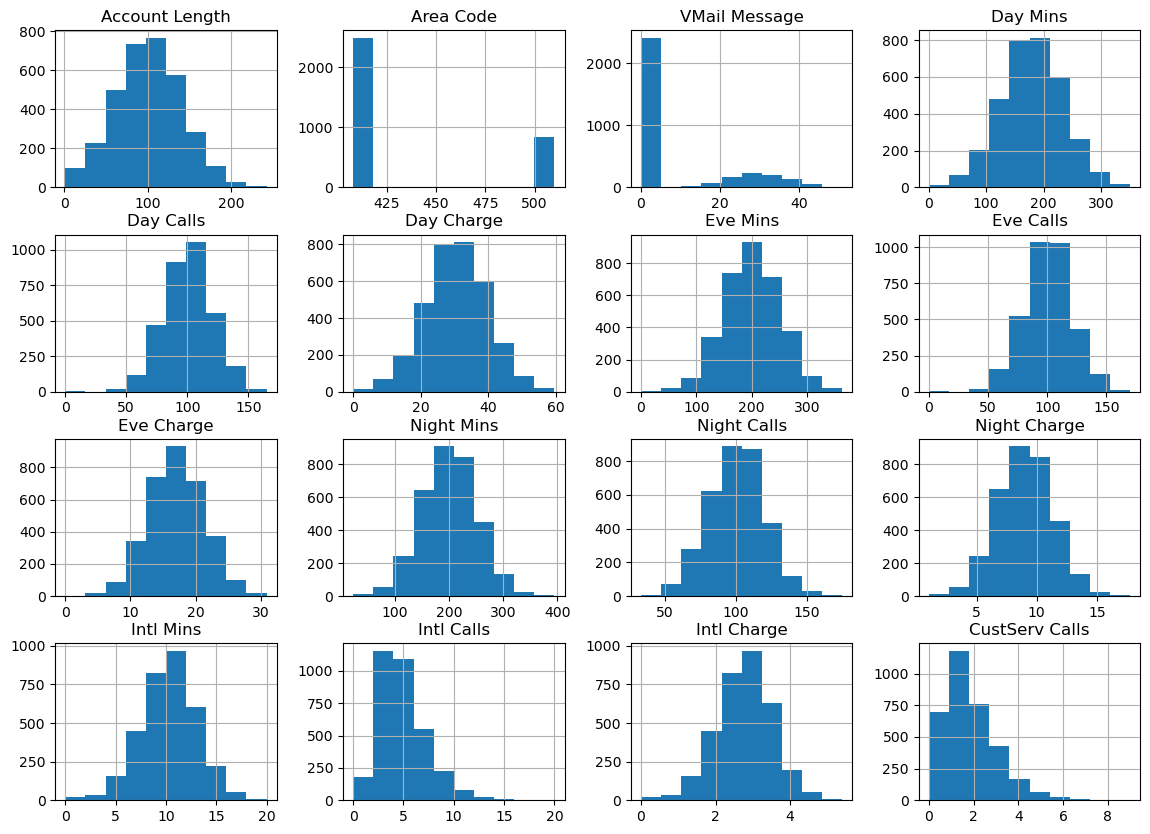

In [18]:
churn.hist(figsize=(14,10))

<Axes: xlabel='CustServ Calls', ylabel='Density'>

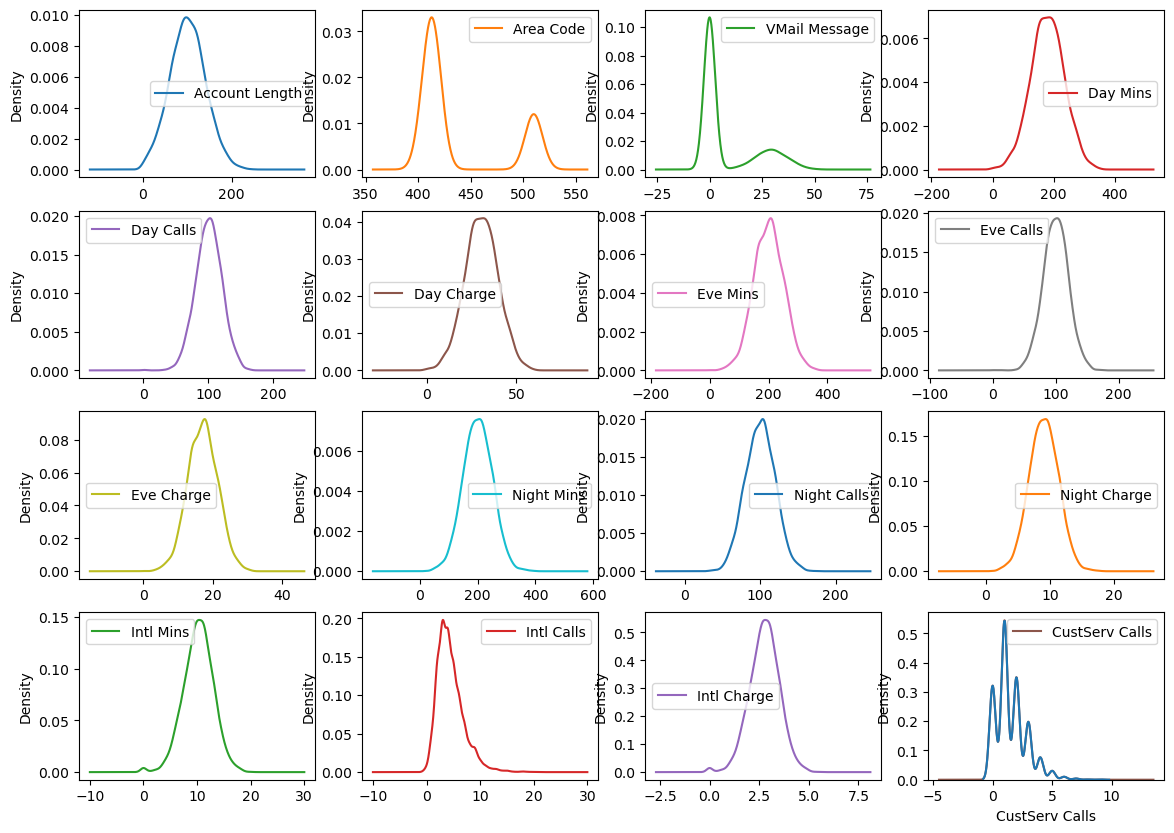

In [19]:
churn.plot(figsize=(14,10), kind='density', subplots=True, layout=(4,4),
sharex=False)
sns.kdeplot(churn["CustServ Calls"])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'Account Length'),
  Text(2, 0, 'Area Code'),
  Text(3, 0, 'VMail Message'),
  Text(4, 0, 'Day Mins'),
  Text(5, 0, 'Day Calls'),
  Text(6, 0, 'Day Charge'),
  Text(7, 0, 'Eve Mins'),
  Text(8, 0, 'Eve Calls'),
  Text(9, 0, 'Eve Charge'),
  Text(10, 0, 'Night Mins'),
  Text(11, 0, 'Night Calls'),
  Text(12, 0, 'Night Charge'),
  Text(13, 0, 'Intl Mins'),
  Text(14, 0, 'Intl Calls'),
  Text(15, 0, 'Intl Charge'),
  Text(16, 0, 'CustServ Calls')])

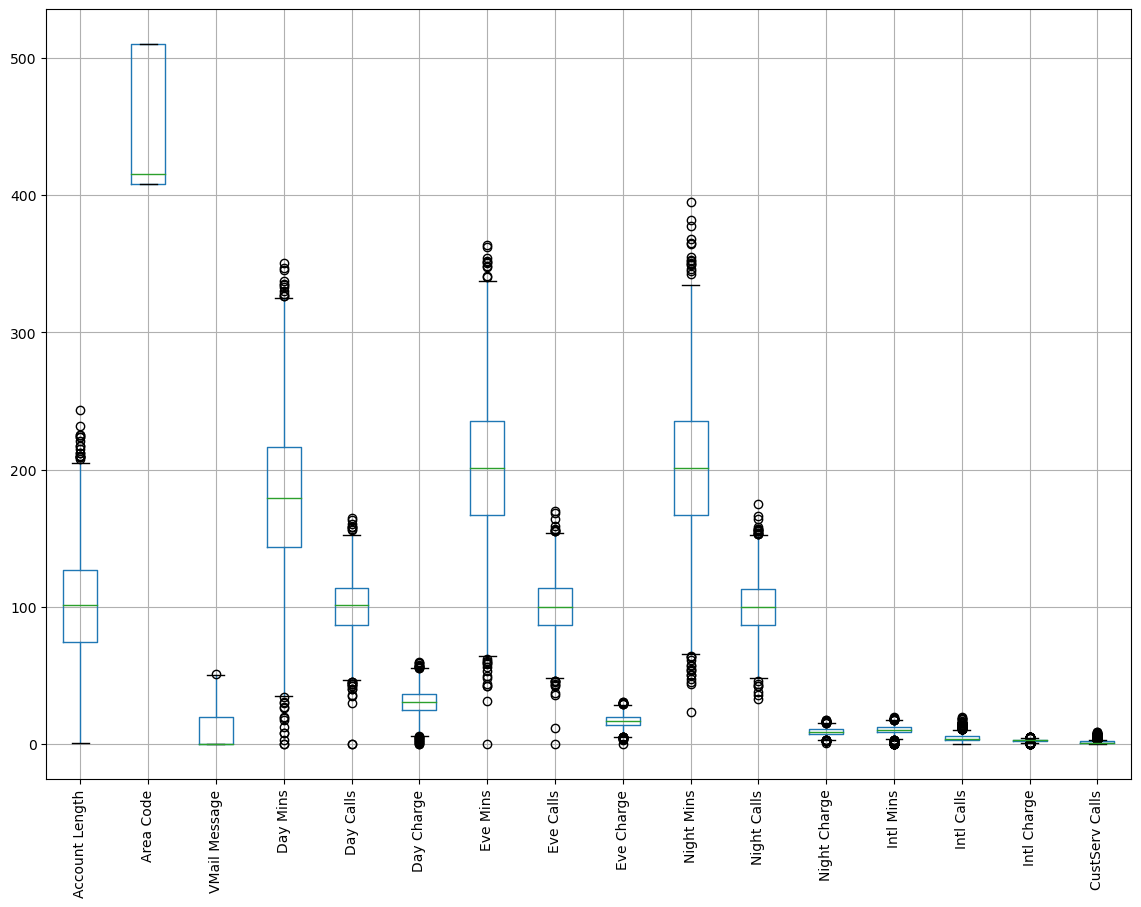

In [20]:
churn.boxplot(figsize=(14,10))
plt.xticks(rotation=90)

Account Length       Axes(0.125,0.712609;0.168478x0.167391)
Area Code         Axes(0.327174,0.712609;0.168478x0.167391)
VMail Message     Axes(0.529348,0.712609;0.168478x0.167391)
Day Mins          Axes(0.731522,0.712609;0.168478x0.167391)
Day Calls            Axes(0.125,0.511739;0.168478x0.167391)
Day Charge        Axes(0.327174,0.511739;0.168478x0.167391)
Eve Mins          Axes(0.529348,0.511739;0.168478x0.167391)
Eve Calls         Axes(0.731522,0.511739;0.168478x0.167391)
Eve Charge            Axes(0.125,0.31087;0.168478x0.167391)
Night Mins         Axes(0.327174,0.31087;0.168478x0.167391)
Night Calls        Axes(0.529348,0.31087;0.168478x0.167391)
Night Charge       Axes(0.731522,0.31087;0.168478x0.167391)
Intl Mins                Axes(0.125,0.11;0.168478x0.167391)
Intl Calls            Axes(0.327174,0.11;0.168478x0.167391)
Intl Charge           Axes(0.529348,0.11;0.168478x0.167391)
CustServ Calls        Axes(0.731522,0.11;0.168478x0.167391)
dtype: object

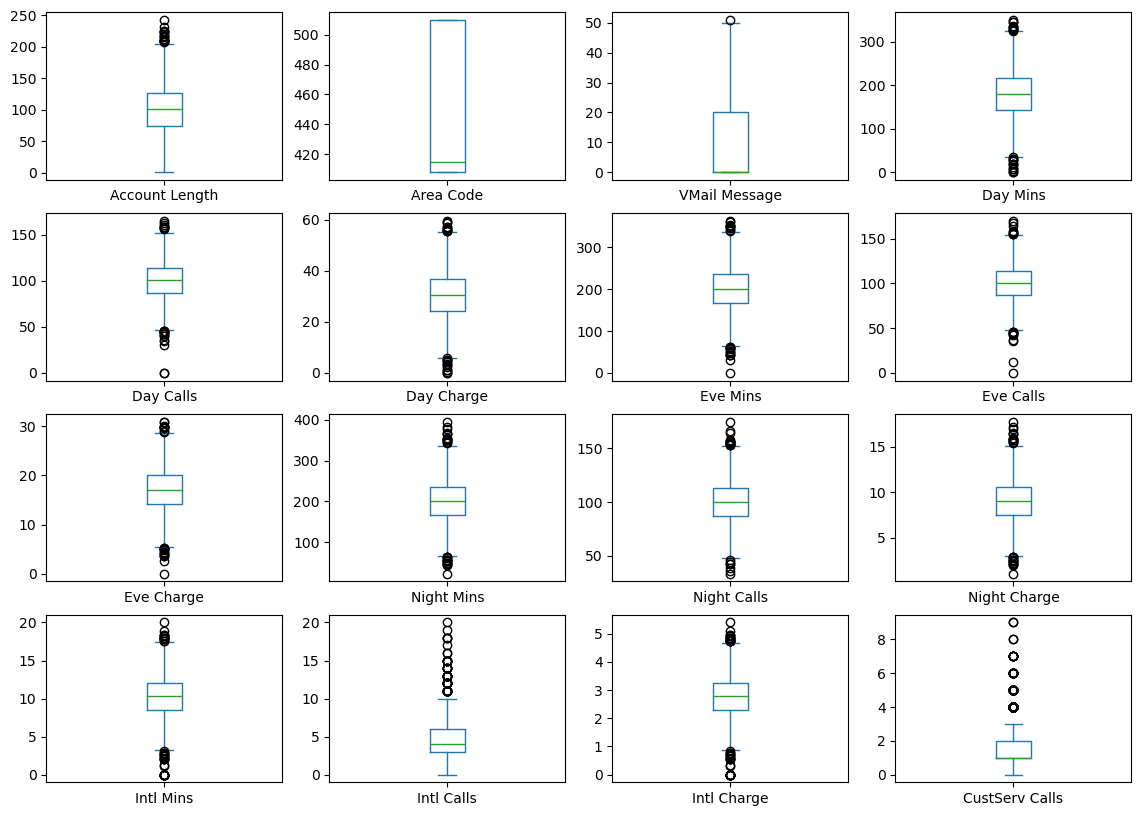

In [21]:
churn.plot(figsize=(14,10), kind='box', subplots=True, layout=(4,4),
sharex=False, sharey=False)

<Axes: xlabel='Churn?', ylabel='CustServ Calls'>

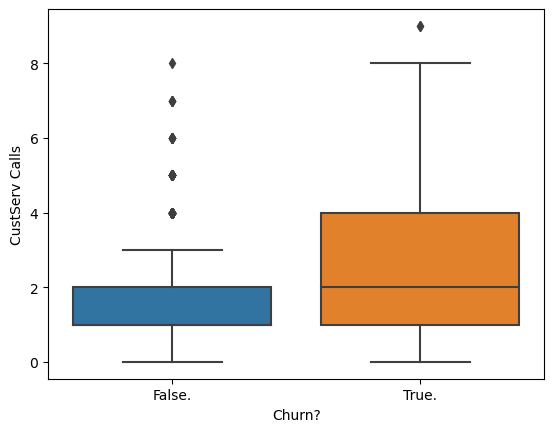

In [22]:
sns.boxplot(x = churn["Churn?"], y = churn["CustServ Calls"], data = churn)

([<matplotlib.axis.XTick at 0x29dc9650af0>,
 [Text(0.45, 0, '0'),
  Text(1.35, 0, '1'),
  Text(2.25, 0, '2'),
  Text(3.1500000000000004, 0, '3'),
  Text(4.05, 0, '4'),
  Text(4.95, 0, '5'),
  Text(5.8500000000000005, 0, '6'),
  Text(6.75, 0, '7'),
  Text(7.65, 0, '8'),
  Text(8.549999999999999, 0, '9')])

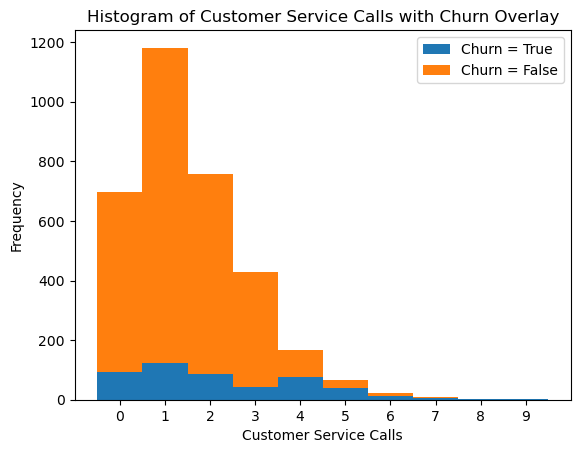

In [23]:
# Separate variable Customer Service Calls by the two values of the target
churn_csc_T = churn[churn["Churn?"] == "True."] ["CustServ Calls"]
churn_csc_F = churn[churn["Churn?"] == "False."] ["CustServ Calls"]
# Create a stacked histogram of the two variables
plt.hist([churn_csc_T, churn_csc_F], bins = 10, stacked = True)
plt.legend(['Churn = True', 'Churn = False'])
plt.title('Histogram of Customer Service Calls with Churn Overlay')
plt.xlabel('Customer Service Calls')
plt.ylabel('Frequency')
xlabels = np.arange(10) # the labels
xpos = [x*0.9+0.45 for x in xlabels] # the label locations
plt.xticks(xpos, xlabels)


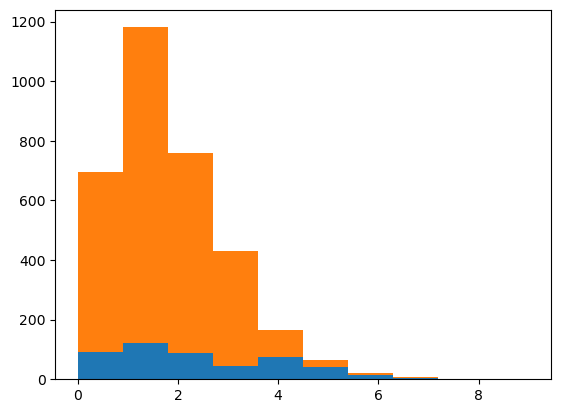

In [24]:
(n, bins, patches) = plt.hist([churn_csc_T, churn_csc_F], bins = 10,
stacked = True)

In [25]:
n[1] = n[1] - n[0]
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

<BarContainer object of 10 artists>

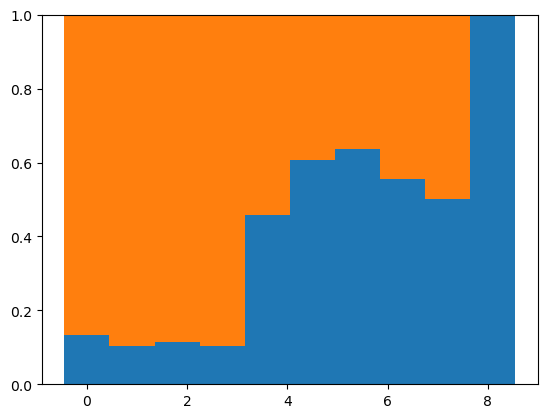

In [26]:
plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] - ourbins[:, 0])
plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0], bottom = n_norm[:,0])

([<matplotlib.axis.XTick at 0x29dc9c77a90>,
 [Text(0.0, 0, '0'),
  Text(0.9000000000000001, 0, '1'),
  Text(1.8, 0, '2'),
  Text(2.7, 0, '3'),
  Text(3.5999999999999996, 0, '4'),
  Text(4.5, 0, '5'),
  Text(5.4, 0, '6'),
  Text(6.3, 0, '7'),
  Text(7.2, 0, '8'),
  Text(8.1, 0, '9')])

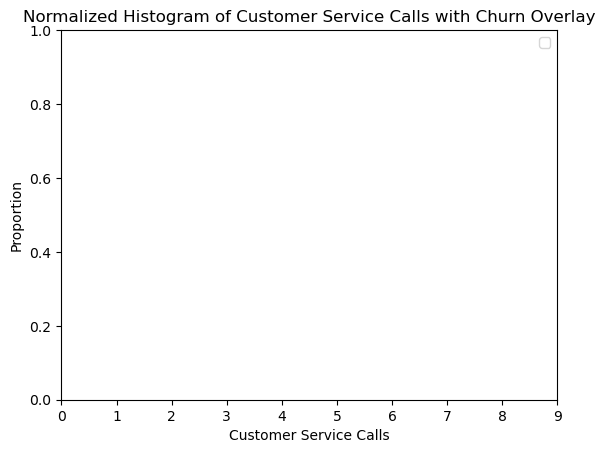

In [27]:
plt.legend(['Churn = True', 'Churn = False'])
plt.title('Normalized Histogram of Customer Service Calls with Churn Overlay')
plt.xlabel('Customer Service Calls')
plt.ylabel('Proportion')
xpos = [x-0.45 for x in xpos]
plt.xticks(xpos, xlabels)

<Axes: xlabel='Day Mins', ylabel='Eve Mins'>

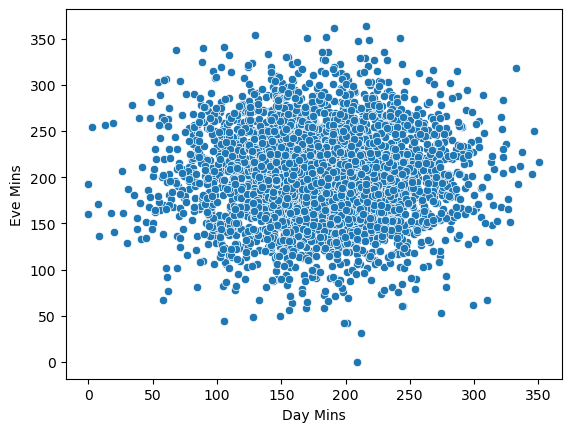

In [28]:
sns.scatterplot(x = "Day Mins", y = "Eve Mins", data = churn)



<Axes: xlabel='Day Mins', ylabel='Eve Mins'>

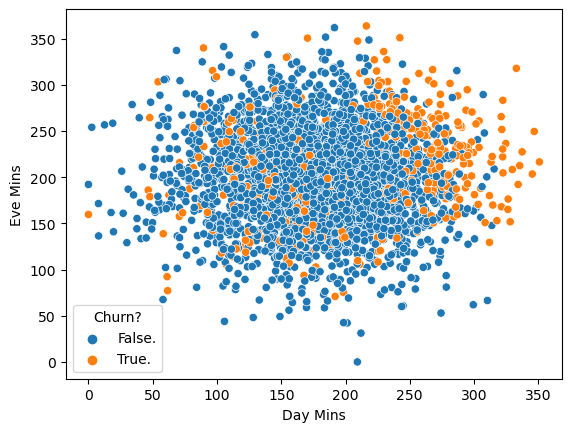

In [29]:
sns.scatterplot(x = "Day Mins", y = "Eve Mins", hue = "Churn?", data = churn)


<Axes: xlabel='Day Mins', ylabel='CustServ Calls'>

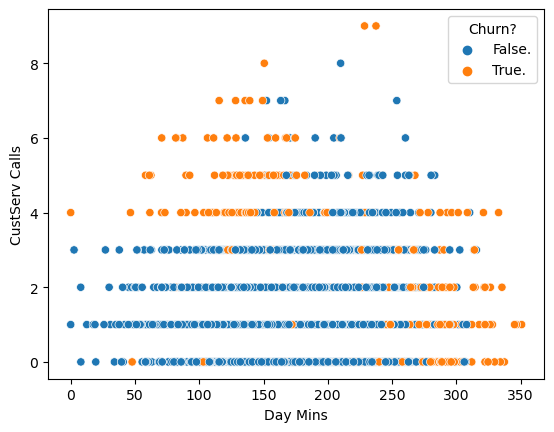

In [30]:
sns.scatterplot(x = "Day Mins", y = "CustServ Calls", hue = "Churn?", data = churn)


<Axes: title={'center': 'Bar Graph of Evening Minutes (Binned) with Churn Overlay'}, xlabel='Churn?'>

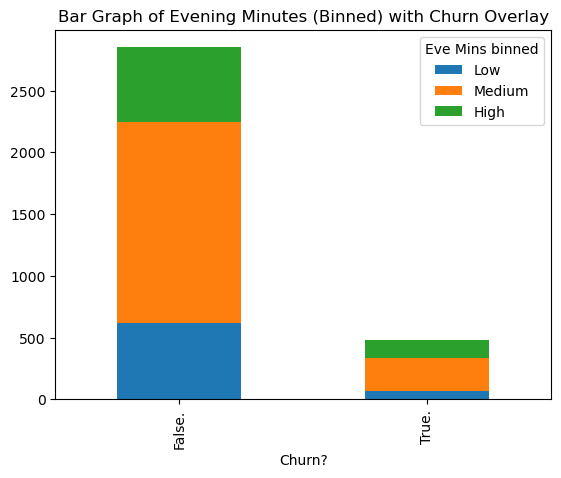

In [31]:
churn['Eve Mins binned'] = pd.cut(x = churn['Eve Mins'], bins = [0, 160.01, 240.01, 400], labels=["Low", "Medium", "High"], right = False)
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Eve Mins binned"])
churn_crosstab.plot(kind = 'bar', stacked = True, title = 'Bar Graph of Evening Minutes (Binned) with Churn Overlay')


<Axes: title={'center': 'Bar Graph of Evening Minutes (Binned) with Churn Overlay'}, xlabel='Eve Mins binned'>

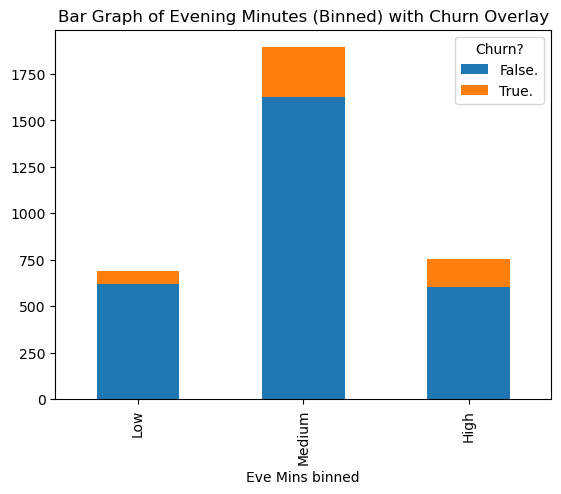

In [32]:
# and pivoted:
churn_crosstab = pd.crosstab(churn["Eve Mins binned"], churn["Churn?"])
churn_crosstab.plot(kind = 'bar', stacked = True, title = 'Bar Graph of Evening Minutes (Binned) with Churn Overlay')

In [33]:
churn_numeric = churn.select_dtypes(include='number')

In [34]:
from pandas.plotting import scatter_matrix


array([[<Axes: xlabel='Account Length', ylabel='Account Length'>,
        <Axes: xlabel='Area Code', ylabel='Account Length'>,
        <Axes: xlabel='VMail Message', ylabel='Account Length'>,
        <Axes: xlabel='Day Mins', ylabel='Account Length'>,
        <Axes: xlabel='Day Calls', ylabel='Account Length'>,
        <Axes: xlabel='Day Charge', ylabel='Account Length'>,
        <Axes: xlabel='Eve Mins', ylabel='Account Length'>,
        <Axes: xlabel='Eve Calls', ylabel='Account Length'>,
        <Axes: xlabel='Eve Charge', ylabel='Account Length'>,
        <Axes: xlabel='Night Mins', ylabel='Account Length'>,
        <Axes: xlabel='Night Calls', ylabel='Account Length'>,
        <Axes: xlabel='Night Charge', ylabel='Account Length'>,
        <Axes: xlabel='Intl Mins', ylabel='Account Length'>,
        <Axes: xlabel='Intl Calls', ylabel='Account Length'>,
        <Axes: xlabel='Intl Charge', ylabel='Account Length'>,
        <Axes: xlabel='CustServ Calls', ylabel='Account Length'>],


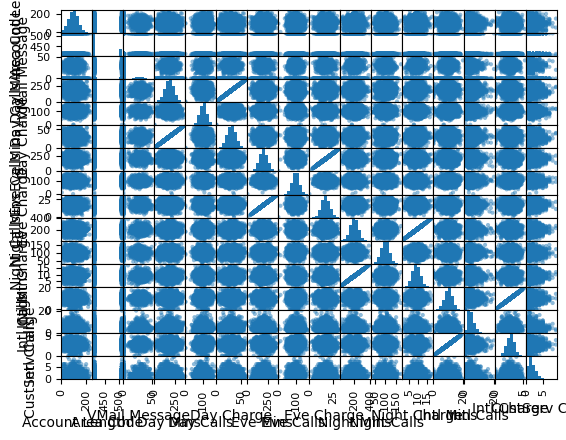

In [35]:
scatter_matrix(churn_numeric)

In [36]:
correlations = churn_numeric.corr()
correlations

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
Area Code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
VMail Message,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Day Mins,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Day Calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Day Charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Eve Mins,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Eve Calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Eve Charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Night Mins,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


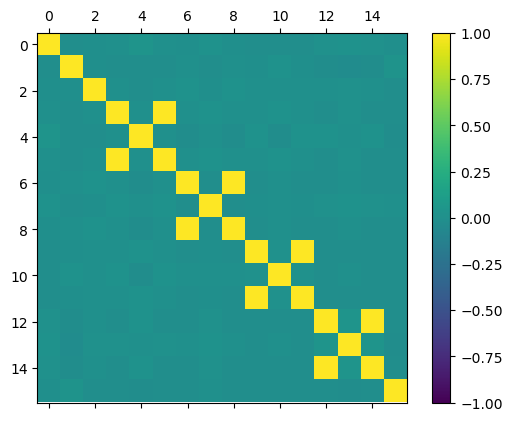

In [37]:
# plot correlation matrix (generic)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

In [38]:
# change the tick labels
ticks = range(0,16,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
numeric_columns = churn.select_dtypes(include='number')
ax.set_xticklabels(numeric_columns, rotation=90)
ax.set_yticklabels(numeric_columns)

[Text(0, 0, 'Account Length'),
 Text(0, 1, 'Area Code'),
 Text(0, 2, 'VMail Message'),
 Text(0, 3, 'Day Mins'),
 Text(0, 4, 'Day Calls'),
 Text(0, 5, 'Day Charge'),
 Text(0, 6, 'Eve Mins'),
 Text(0, 7, 'Eve Calls'),
 Text(0, 8, 'Eve Charge'),
 Text(0, 9, 'Night Mins'),
 Text(0, 10, 'Night Calls'),
 Text(0, 11, 'Night Charge'),
 Text(0, 12, 'Intl Mins'),
 Text(0, 13, 'Intl Calls'),
 Text(0, 14, 'Intl Charge'),
 Text(0, 15, 'CustServ Calls')]

<BarContainer object of 10 artists>

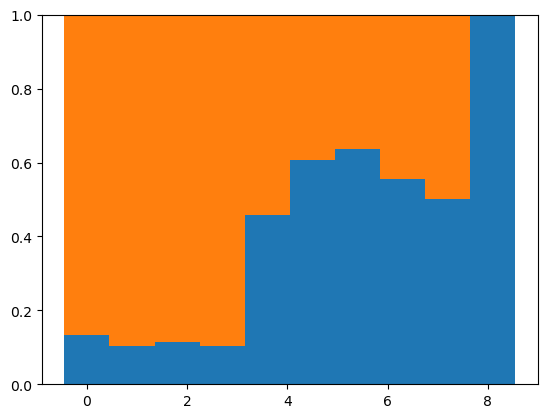

In [39]:
plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] - ourbins[:, 0])
plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0], bottom = n_norm[:,0])